# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

%matplotlib inline

In [4]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [5]:
data.head(2)

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,


In [6]:
# Set options to inspect all of the columns
pd.options.display.max_columns = 65 

# Inspect the structure of the dataframe
data.head(3)

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,occupbroad,workinschool,email,computerskills,specialskills,firstname,sex,race,h,l,call,city,kind,adid,fracblack,fracwhite,lmedhhinc,fracdropout,fraccolp,linc,col,expminreq,schoolreq,eoe,parent_sales,parent_emp,branch_sales,branch_emp,fed,fracblack_empzip,fracwhite_empzip,lmedhhinc_empzip,fracdropout_empzip,fraccolp_empzip,linc_empzip,manager,supervisor,secretary,offsupport,salesrep,retailsales,req,expreq,comreq,educreq,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,1,0,0,1,0,Allison,f,w,0.0,1.0,0.0,c,a,384.0,0.989360,0.005500,9.527484,0.274151,0.037662,8.706325,1.0,5,,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,6,1,1,1,0,Kristen,f,w,1.0,0.0,0.0,c,a,384.0,0.080736,0.888374,10.408828,0.233687,0.087285,9.532859,0.0,5,,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,1,1,0,1,0,Lakisha,f,b,0.0,1.0,0.0,c,a,384.0,0.104301,0.837370,10.466754,0.101335,0.591695,10.540329,1.0,5,,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,


In [7]:
data[['call','race']].head(7)

,call,race
0,0.0,w
1,0.0,w
2,0.0,b
3,0.0,b
4,0.0,w
5,0.0,w
6,0.0,w


In [8]:
data[['call','race']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4870 entries, 0 to 4869
Data columns (total 2 columns):
call    4870 non-null float32
race    4870 non-null object
dtypes: float32(1), object(1)
memory usage: 95.1+ KB


In [9]:
# Check for duplicate observations:
data.duplicated().sum()

0

In [10]:
# Check for null values:
data[['race','call']].isnull().sum()

race    0
call    0
dtype: int64

/Users/amy/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


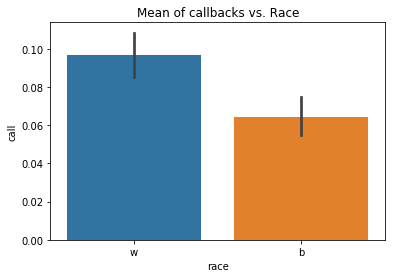

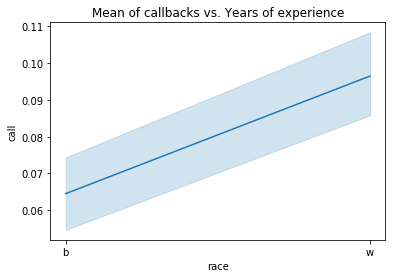

In [11]:

sns.barplot(x="race",y="call",data=data)
plt.title("Mean of callbacks vs. Race")
plt.show()

sns.lineplot(x="race",y="call",data=data)
plt.title("Mean of callbacks vs. Years of experience")
plt.show()

## Task-1: What test is appropriate for this problem? Does CLT apply?

### a- First method (crosstab func): 

In [12]:
call_table = pd.crosstab(data['call'],data['race'],margins=True)

# Label the index column:
call_table.index=['No','Yes', 'Total']

# Label the header row:
call_table.columns = ['Black', 'White', 'Total']

In [13]:
call_table

,Black,White,Total
No,2278,2200,4478
Yes,157,235,392
Total,2435,2435,4870


### b- Second method (groupby func): 

In [14]:
# Group data by 'race': by_race
by_race = data.groupby('race')

# Compute the sum of the 'call' of by_race: by_race_sum
by_race_sum = by_race['call'].sum()
print("The number of calls for black-sounding and white-sounding resumes: ", by_race_sum)

The number of calls for black-sounding and white-sounding resumes:  race
b    157.0
w    235.0
Name: call, dtype: float32


### c- Third method: 

In [15]:
# These two lines of codes give the same result.
# len(data[data['race']=='b'][data['call']==1])
# len(data.loc[data['race']=='b'].loc[data['call']==1])

In [16]:
# Check for the total number of black-sounding names and the total number of calls for black-sounding resumes

print (" The number of black-sounding resumes:", len (data.race[data.race == 'b']), "\n",
       "The number of calls for black-sounding resumes:", len(data.loc[data['race']=='b'].loc[data['call']==1]))

print ("\n")

# Check for the total number of black-sounding names and the total number of calls for black-sounding resumes

print (" The number of white-sounding resumes:", len (data.race[data.race == 'w']), "\n",
       "The number of calls for black-sounding resumes:", len(data.loc[data['race']=='w'].loc[data['call']==1]))

 The number of black-sounding resumes: 2435 
 The number of calls for black-sounding resumes: 157


 The number of white-sounding resumes: 2435 
 The number of calls for black-sounding resumes: 235


**Conclusion:**
> To figure out the 'black' and 'white' resume amounts and call backs we grouped by race and call. Both has 2435 resumes, but black got 157 calls while white got 235 calls.

> Since the rate of callbacks for the two groups is compared, a two-proportion z-test is appropriate as both of them are larger than 30.

> Central Limit Theorem (CLT) states that regardless of the population, the distribution of sample averages tends to be normal. This holds for sample sizes greater than or equal to 30. Since the size of the data is big enough and 'black' and 'white' values in race are assigned randomly to the resumes when presented to the employer, CLT could be applied here assuming that samples are respresenting the population.

## Task-2: What are the null and alternate hypotheses?

As observed above, it is obvious that white-sounding names received more callbacks than black-sounding names, but is the difference significant? 

Here is the important point to define the null and alternative hypothesis:

If testing something assumed to be true, the null hypothesis can reflect the assumption.
If testing a claim we want to be true, but can't assume, we test its opposite.

In the context of provided background information, the alternative hypothesis assumes that racial discrimination is pervasive enough to be a factor in the job market.
Null Hypothesis: There is no difference in the proportion of callbacks for white-sounding names and the proportion of callbacks for black-sounding names:

$$H_0: \hat p_{white\_callbacks} - \hat p_{black\_callbacks} = 0$$

Alternative Hypothesis: There is a significant difference in the proportion of callbacks for white-sounding names and the proportion of callbacks for black-sounding names:

$$H_a: {\hat p_{white\_callbacks}} - {\hat p_{black\_callbacks}} \neq 0$$
Significance Level: 95% Confidence:

## Task-3: Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.

### a- Bootstrapping approach:

**i. First method (permutation):**

In [22]:
def bootstrap_replicate_1d(data, func):
   ...:     """Generate bootstrap replicate of 1D data."""
   ...:     bs_sample = np.random.choice(data, len(data))
   ...:     return func(bs_sample)

In [23]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

In [24]:
black= data[data.race=='b']['call']
white= data[data.race=='w']['call']

# Compute the difference in mean sperm count: diff_means
diff_means = np.mean(white) - np.mean(black)


# Compute mean of pooled data: mean_count
mean_count = np.mean(np.concatenate((white , black)))

# Generate shifted data sets
white_shifted = white - np.mean(white) + mean_count
black_shifted = black - np.mean(black) + mean_count

# Generate bootstrap replicates
bs_reps_white = draw_bs_reps(white_shifted,
                               np.mean, size=10000)
bs_reps_black = draw_bs_reps(black_shifted,
                               np.mean, size=10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_reps_white - bs_reps_black

# Compute and print p-value: p
p = np.sum(bs_replicates >= np.mean(white) - np.mean(black)) \
            / len(bs_replicates)
print('p-value =', p)

p-value = 0.0


In [25]:
bs_ci = np.percentile(bs_replicates, [2.5, 97.5])
print ('95% conf. int.:',bs_ci)

95% conf. int.: [-0.01519511  0.01519505]


**ii. Second method (permutation):**

In [60]:
# Define difference function to compute difference in proportions
def diff_of_p(x,y):
    return abs(np.sum(x) - np.sum(y))

In [61]:
# Define bootstrap function that randomly split data
def bs_split_data(data, func, size=1):
    
    # Initialize replicates
    bs_replicates = np.empty(size)
    
    for i in range(size):
        # Permutate the concatenated array: permutated_data
        permuted_data = np.random.permutation(data)
        
        # Split the permuted array into two: perm_sample_1, perm_sample_2
        # Assume data can be split into even numbers
        half_count = int(len(data)/2)
        perm_sample_1 = permuted_data[:half_count]
        perm_sample_2 = permuted_data[half_count:]
        
        # Call function
        bs_replicates[i] = func(perm_sample_1/half_count, perm_sample_2/half_count)
        
    return bs_replicates

In [62]:
# Defining variables

black_call_mean = data[data.race=='b']['call'].mean()
white_call_mean = data[data.race=='w']['call'].mean()

# Acquire 10000 bootstrap replicates using difference of proprotion
bs_replicates = bs_split_data(data.call, diff_of_p, size=10000)

bs_p_value = np.sum(bs_replicates>=diff_of_p(white_call_mean, black_call_mean))/len(bs_replicates)

print("p-value =", bs_p_value)

p-value = 0.0001


In [69]:
bs_ci = np.percentile(bs_replicates, [2.5, 97.5])
print ('95% conf. int.:',bs_ci)

95% conf. int.: [7.45058060e-09 1.72484666e-02]


**iii. Third method (for loop):**

In [65]:
diff_mean = w_call_mean - b_call_mean

# Construct arrays of data: white-sounding names, black-sounding names
calls=np.sum(data.call[data.call==1])
all_callbacks = np.array([True] * int(calls) + [False] * int(len(data)-calls))

size = 10000

bs_reps_diff = np.empty(size)

for i in range(size):
    w_bs_replicates = np.sum(np.random.choice(all_callbacks, size=len(w)))
    b_bs_replicates = np.sum(np.random.choice(all_callbacks, size=len(b)))
    
    bs_reps_diff[i] = (w_bs_replicates - b_bs_replicates)/len(b)
    
bs_p_value = np.sum(bs_reps_diff >= diff_mean) / len(bs_reps_diff)

bs_ci = np.percentile(bs_reps_diff, [2.5, 97.5])
bs_mean_diff = np.mean(bs_reps_diff)

print('BOOTSTRAP RESULTS\np-value: {}\n95% conf. int.: {}'.format(bs_p_value, bs_ci))

BOOTSTRAP RESULTS
p-value: 0.0
95% conf. int.: [-0.01519507  0.01478439]


### b. Frequentist Statical Approach

**i. First Approach**

In [70]:
# Assign black and white race into variables
b = data[data.race == 'b']
w = data[data.race == 'w']

# Find the mean for black and white
b_call_mean = b.call.mean()
w_call_mean = w.call.mean()
print ('Black mean: {}'.format(b_call_mean))
print ('White mean: {}'.format(w_call_mean))

# Find the difference of mean for black and white
diff_mean = w_call_mean - b_call_mean
print ('Difference of mean between white and black: {}'.format(diff_mean))

Black mean: 0.0644763857126236
White mean: 0.09650924056768417
Difference of mean between white and black: 0.03203285485506058


    **z-score**

In [73]:
w_call = np.sum(data[data.race=='w'].call)
b_call = np.sum(data[data.race=='b'].call)
w_ln = len(data[data.race=='w'])
b_ln = len(data[data.race=='b'])            
phat = (w_call + b_call) / (w_ln + b_ln)
z = (diff_mean) / np.sqrt(phat * (1 - phat) * (( 1/ float(w_ln)) + (1/float(b_ln))))
print ('z score:{}'.format(z))

z score:4.108412235238472


    **p-value**

In [74]:
p = stats.norm.cdf(-z)*2
print ('p-value:{}'.format(p))

p-value:3.983885409504418e-05


    **margin of error**

In [75]:
moe = 1.96 * np.sqrt(phat * (1 - phat) * (( 1/ float(w_ln)) + (1/float(b_ln))))
print("Margin of Error: {}".format(moe))

Margin of Error: 0.015281912310894095


    **confidence interval**

In [76]:
ci = diff_mean + np.array([-1, 1]) * moe
print("Confidence interval: {}".format(ci))

Confidence interval: [0.01675094 0.04731477]


**i. Second Approach**

In [86]:
white = sum(data[data.race=='w'].call) / len(data)
black = sum(data[data.race=='b'].call) / len(data)
w_and_b = sum(data.call) / len(data)

In [92]:
## White-sounding names callbacks
white/w_and_b

0.5994897959183674

In [93]:
## Black-sounding names callbacks
black/w_and_b

0.4005102040816327

/Users/amy/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


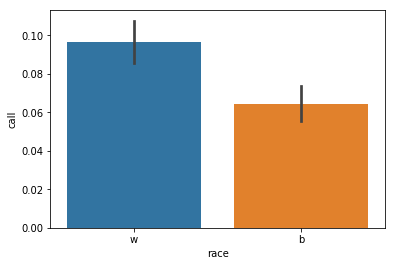

In [97]:
race_vs_call = data[['race','call']]
sns.barplot(x='race', y='call', data=race_vs_call)
plt.show()

Compared to all applicants who got a callback, white sounding names got called back 59.95% of the time and black-sounding names got called back 40.05% of the time.
Specifically, white-sounding names got 19.90% more callbacks than black-sounding names.

In [94]:
white_callback = data[data.race=='w'].call
black_callback = data[data.race=='b'].call
stats.ttest_ind(black_callback, white_callback)

Ttest_indResult(statistic=-4.114705290861751, pvalue=3.940802103128886e-05)

In [95]:
## White-sounding names
ci = 1.96
p = white/w_and_b
margin_of_error = np.sqrt((p*(1-p)/len(data)))*ci
ci_lo = p - margin_of_error
ci_hi = p + margin_of_error
print("White-sounding names")
print("Mean: ", p)
print("Margin of error: ", margin_of_error)
print("Confidence interval: ", ci_lo, ',', ci_hi)

White-sounding names
Mean:  0.5994897959183674
Margin of error:  0.013762244874422664
Confidence interval:  0.5857275510439447 , 0.61325204079279


In [96]:
## Black-sounding names
ci = 1.96
p = black/w_and_b
margin_of_error = np.sqrt((p*(1-p)/len(data)))*ci
ci_lo = p - margin_of_error
ci_hi = p + margin_of_error
print("Black-sounding names")
print("Mean: ", p)
print("Margin of error: ", margin_of_error)
print("Confidence interval: ", ci_lo, ',', ci_hi)

Black-sounding names
Mean:  0.4005102040816327
Margin of error:  0.013762244874422664
Confidence interval:  0.38674795920721 , 0.41427244895605536


**Conclusion:**

The p-value is very low than 5% we can conclude that there is a significant difference between two groups, so the null hypothesis is rejected. There is sufficient evidence to warrant rejection of the claim that there is no difference in the proportion of callbacks for white-sounding names and the proportion of callbacks for black-sounding names.

## 4. Write a story describing the statistical significance in the context or the original problem.


Researchers randomly assigned identical resumes to black-sounding or white-sounding names and recorded the impact on requests for interviews from employers in order to study the effect of racial discrimination in the U.S. labor market. That analysis tested the effect of race on callback success. Assuming controls were appropriate for other factors related to callbacks, the statistics test indicates that racial discrimination in the United States labor market is significant.
Given our sample data and our findings in this project, we can infer that a black- or white-sounding name on a resume has a significant effect on requests for interviews from employers. We also see that resumes with a white-sounding name see a 50% higher callback rate over resumes with a black-sounding name.
Based on the result of p-value which is too close to 0, we have a strong evidence to reject the null hypothesis which we assumes at the beginning as no racial discrimination when calling back to resumes. We can say that there is a difference in the proportion of callbacks for white-sounding names and the proportion of callbacks for black-sounding names when returning to resumes. In a conclusion, our findings indicate a racial discrimination in USA job market when returning to resumes.

## 5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

The analysis we made does not mean that race is the most crucial factor in callback success. Despite the test shows that callback rates differs, other variables as such year of experience, education or maybe military statistics might effect the callback rates and need to be also checked. It would be prudent to examine these other possible data points as they may be responsible for the significant difference in callback rate. We explored the data in a manner that is framed by the assumption that race plays a factor in callback rate. I think it would be logical to expand the analysis over the entire dataset. With this analysis, we can proceed confirming the effect of race on callback rates or perhaps find other factors which affect callback rates.